## Simulation Techniques

#### Introduction

* numerical methods for solving ordinary differential equations
* **or** estimating definite integrals for which the indefinite integral does not exist
* Euler's Method, Runge-Kutta 2, Runge-Kutta 4

#### Euler's method

* Recall the differential equation for the unconstrained growth model
$$\frac{dP}{dt}=.10P$$
with
$$P_0=100$$

* This represents the following finite difference equations using **Euler's method**

growth_rate = 0.10 <br />
population(0) = 100 <br />
growth($t$) = growth_rate $*$ population($t - \Delta t$) <br />
population($t$) = population($t - \Delta t$) + growth($t$) $*\Delta t$ <br />

* Using $P_0=100$ and $\Delta t = 8$, if we were to evaluate this differential equation at $P_1=P(8)$ using Euler's method
* The flow (change in the population, or growth) is the derivative at $P(t-\Delta t)$
* $t=8$ and $t - \Delta t = 0$
* $P^{\prime}(0)=.1(100)=10$
* $\Delta P = P^{\prime}(0) \times \Delta t = 10 \times 8 = 80$

$\begin{aligned}
\text{Estimate for } P_1 & = \text{previous value of } P + \text{estimated change in} P \cr
& = P_0 + \Delta P^{\prime}(0)\Delta t \cr
& = 100 + 10(8) \cr
& = 180 \cr
\end{aligned}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exp_growth(t, const=100, growth_rate=.1):
    """
    True solution
    """
    return const * np.exp(growth_rate * t)

In [3]:
x = np.linspace(-4, 12, 100)

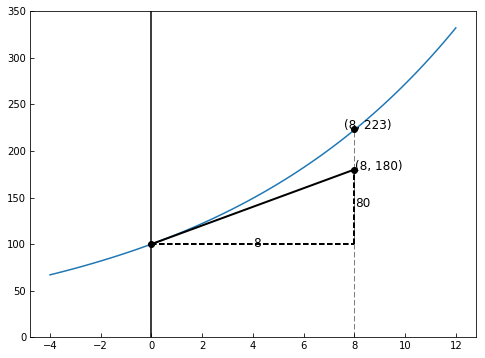

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("8", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 180), 'k--', lw=2)
ax.annotate("80", (8,140), xytext=(1,0), textcoords="offset points", 
            fontsize="large")
ax.plot((0, 8), (100, 180), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 180, 'ko', 8, 223, 'ko')
ax.annotate("(8, 180)", (8, 180), xytext=(1,0), textcoords="offset points",
            fontsize="large")
ax.vlines(0, 0, 350)
ax.plot((8,8), (0,223), 'k--', lw=.5)
ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

**Algorithm: Euler's Method**
$$t \longleftarrow t_0$$
$$P(t_0) \longleftarrow P_0$$

Initialize $simulation\_length$

while $t < simulation\_length$ do the following

<p style="text-indent: 2em">$$t \longleftarrow t + \Delta t$$
$$P(t) = P(t-\Delta t) + P^{\prime}(t-\Delta t)\Delta t$$</p>

Minimize error accumulation by using integer multiples of $\Delta t$

**Algorithm: Revised Euler's Method**
$$t \longleftarrow t_0$$
$$P(t_0) \longleftarrow P_0$$

Initialize $number\_of\_steps$

for $n$ going from 1 up through $number\_of\_steps$ do the following

<p style="text-indent: 2em">$$t_n \longleftarrow t_0 + n*\Delta t$$
$$P_{n} = P_{n-1} + P^{\prime}_{n-1}\Delta t$$</p>

#### Error

Recall the formula for the relative error

$$rel. err = \frac{|correct-result|}{|correct|}$$

Also recall that the solution to this differential equation is for computing the "truth" is

$$P(t) = 100e^{.1t}$$

1. Write a function that computes the relative error of a number. Call this function `relative_error`.
2. Write a function that implements Euler's method. Call it `euler`. The call signature should take a derivative function, *func*, an initial value, *initial*, the length of time to run, *ntime*, a time step, *dt*, and a tuple for any other args that might be passed to *func*, *args*. The call signature of *func* should be `func(P, t, growth_rate)`. [**Hint:** To calculate the number of steps use n]
3. Use your Euler's method to solve the differential equations for unconstrained growth.
$$\frac{dP}{dt}=.10P$$
with
$$P_0=100$$
from $t=0$ to $t=100$
for dt = [1, .5, .25]
4. Calculate the relative error for dt=[1, .5, .25].
5. What is the percentage reduction in relative error for each subsequent dt?

#### Runge-Kutta 2 Method

* AKA Euler's Predictor-Corrector (EPC) Method
* Think of Euler's method as a "predictor"
* Corrector step
  * Ideally we would like to use the slope of the secant line between $(0, P(0))$ and $(8, P(8))$ instead of the tangent line

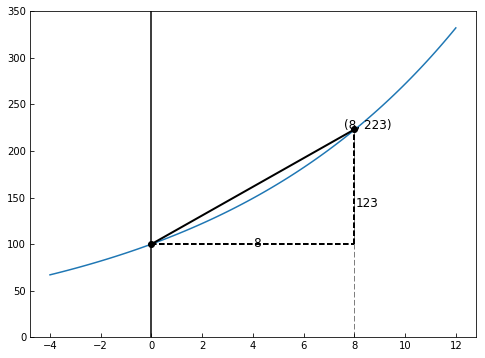

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("8", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 223), 'k--', lw=2)
ax.annotate("123", (8,140), xytext=(1,0), textcoords="offset points", 
            fontsize="large")
ax.plot((0, 8), (100, 223), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)
ax.plot((8,8), (0,223), 'k--', lw=.5)
ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

* corrector step (con't)
  * We don't know $P(8)$
  * Estimate it as the average of the slopes of the tangent lines at P(0) and P(8)

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
# y = mx + b
ax.plot((-4, 0, 8), (-4*(10)+100, 100, 180), 'k-', lw=2)
m = .1 * 223
b = 223 - m*8
ax.plot((2, 8, 12), (2*m+b, 8*m+b, 12*m+b), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)

* We still don't know P(8) though
* We have an estimate of P(8) from Euler's method
  * $P(8) \approx 180$
* The slope of the tangent line at this point is
  * $f(8, 180) = .1(180) = 18$
* The approximate slope of the secant line between $(0, P(0))$ and $(8, P(8))$ is
  * $\frac{10 + 18}{2}=.5(10+18)=14$
* Use 14 to compute corrected $P_1$
  * $P_1 = 100 + 14(8) = 212$

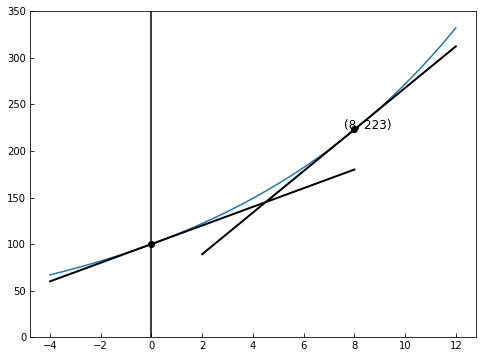

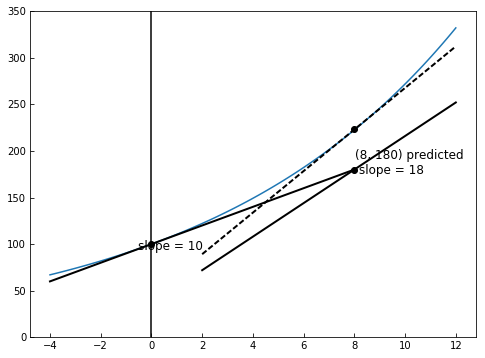

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
# y = mx + b
ax.plot((-4, 0, 8), (-4*(10)+100, 100, 180), 'k-', lw=2)
m = .1 * 223
b = 223 - m*8
ax.plot((2, 8, 12), (2*m+b, 8*m+b, 12*m+b), 'k--', lw=2)
m = .1 * 180
b = 180 - m*8
ax.plot((2, 8, 12), (2*m+b, 8*m+b, 12*m+b), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 223, 'ko', 8, 180, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(8, 180) predicted\n slope = 18", (8, 180), xytext=(1,-4), 
            textcoords="offset points", fontsize="large")
ax.annotate("slope = 10", (0, 100), xytext=(-13,-6), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

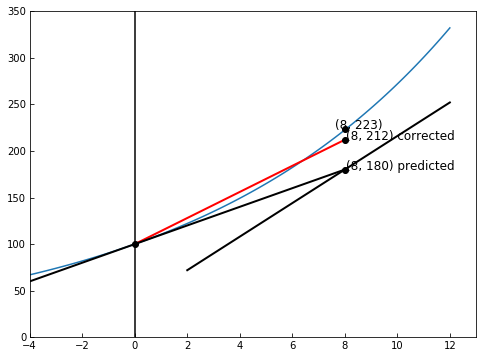

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-4, 13)

ax.plot((0, 8), (100, 212), 'r-', lw=2)
ax.plot(0, 100, 'ko', 8, 223, 'ko', 8, 212, 'ko', 
        8, 180, 'ko')
ax.vlines(0, 0, 350)

# y = mx + b
ax.plot((-4, 0, 8), (-4*(10)+100, 100, 180), 'k-', lw=2)
m = .1 * 180
b = 180 - m*8
ax.plot((2, 8, 12), (2*m+b, 8*m+b, 12*m+b), 'k-', lw=2)

ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.annotate("(8, 212) corrected", (8, 212), xytext=(1,0), 
            textcoords="offset points", fontsize="large")
ax.annotate("(8, 180) predicted", (8, 180), xytext=(1,0), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

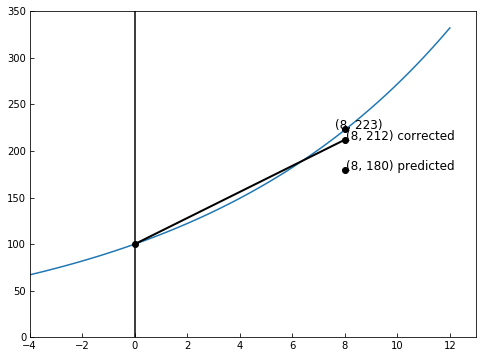

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-4, 13)

ax.plot((0, 8), (100, 212), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 223, 'ko', 8, 212, 'ko', 
        8, 180, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.annotate("(8, 212) corrected", (8, 212), xytext=(1,0), 
            textcoords="offset points", fontsize="large")
ax.annotate("(8, 180) predicted", (8, 180), xytext=(1,0), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

**Algorithm: EPC (Runge-Kutta 2) Method**
$$t \longleftarrow t_0$$
$$P(t_0) \longleftarrow P_0$$

Initialize $number\_of\_steps$

for $n$ going from 1 to $number\_of\_steps$ do the following

<p style="text-indent: 2em">$$t_n \longleftarrow t_0 + n*\Delta t$$
    $$Y_n=P_{n-1}+f(t_{n-1}, P_{n-1})\Delta t \text{,  Euler's Method estimate}$$
    $$P_n = P_{n-1} + .5(f(t_{n-1}, P_{n-1})+f(t_n, Y_n))\Delta t$$</p>

1. Write a function that computes the relative error of a number.
2. Write a function that implements the Runge Kutta 2 method. Call it `runge_kutta2`. The call signature should take a derivative function, *func*, an initial value, *initial*, the length of time you want to simulate, *ntime*, a time step, *dt*, and a tuple for any other args that might be passed to *func*, *args*. The call signature of *func* should be `func(P, t, growth_rate)`.
3. Use `runge_kutta2` to solve the differential equations for unconstrained growth.
$$\frac{dP}{dt}=.10P$$
with
$$P_0=100$$
from $t=0$ to $t=100$
for dt = [1, .5, .25]
4. Calculate the relative error for dt=[1, .5, .25].
5. What is the percentage reduction in relative error for each subsequent dt?

#### Runge-Kutta 4

* similar to **Runge-Kutta 2**
* RK4 computes $P_n$ by adding a weighted average of 4 estimates of the change in $P$ to $P_{n-1}$
* This weighted average is a function of $\partial_1, \partial_2, \partial_3, \partial_4$

##### First estimate of $\Delta P$

* Same as Euler's method
$$\partial_1 = f(t_{n-1}, P_{n-1})\Delta t$$

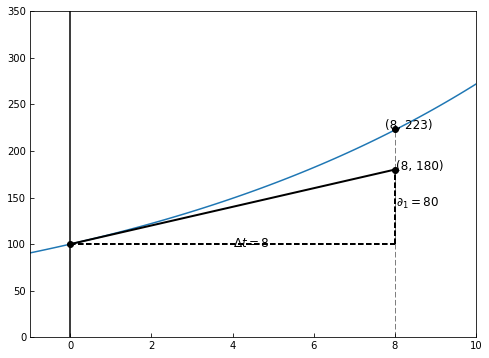

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)
ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("$\Delta t = 8$", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 180), 'k--', lw=2)
ax.annotate("$\partial_1=80$", (8,140), xytext=(1,0), textcoords="offset points", 
            fontsize="large")
ax.plot((0, 8), (100, 180), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 180, 'ko', 8, 223, 'ko')
ax.annotate("(8, 180)", (8, 180), xytext=(1,0), textcoords="offset points",
            fontsize="large")
ax.vlines(0, 0, 350)
ax.plot((8,8), (0,223), 'k--', lw=.5)
ax.annotate("(8, 223)", (8, 223), xytext=(-10,1), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

##### Second estimate of $\Delta P$

* use the point halfway between $(t_0, P_0)$ and Euler's predictor to calculate tangent line
  * (8/2, (280/2))

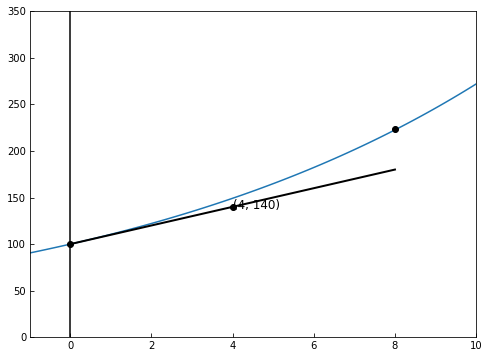

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

ax.plot((0, 8), (100, 180), 'k-', lw=2)
ax.plot(0, 100, 'ko', 4, 140, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(4, 140)", (4, 140), xytext=(0,-2), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

* Slope the same as Euler's corrector in EPC method (Runge-Kutta 2)
  * $f(4, 140) = .1(140) = 14$
* Calculate new predictor
  * $\partial_2=f(t_{n-1} + 0.5\Delta t, P_{n-1} + 0.5\partial_1)\Delta t$

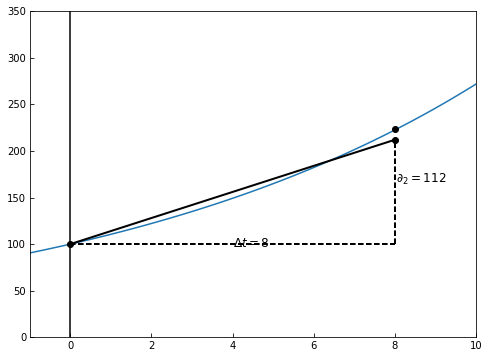

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)


ax.plot((0, 8), (100, 212), 'k-', lw=2)
ax.plot(0, 100, 'ko', 8, 212, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)

ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("$\Delta t = 8$", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 212), 'k--', lw=2)
ax.annotate("$\partial_2=112$", (8, 166), xytext=(1,0), textcoords="offset points", 
            fontsize="large")

ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

##### Third Estimate of $\Delta t$

* Repeat the same process for $\partial_2$ to calculate $\partial_3$ using the tangent line in $\partial_2$ instead
* Find the mid-point of this line
  * (8/2, 212/2)

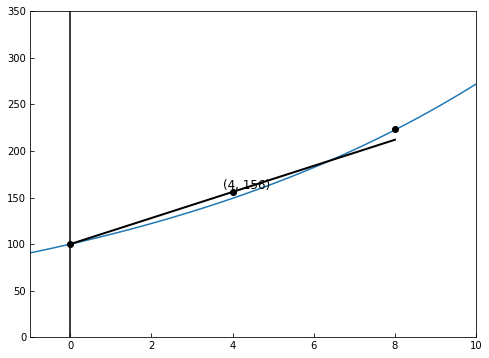

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

ax.plot((0, 8), (100, 212), 'k-', lw=2)
ax.plot(0, 100, 'ko', 4, 156, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(4, 156)", (4, 156), xytext=(-10,3), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

* Calculate the slope of dP/dt
  * $f(4, 156) = .1(156) = 15.6$

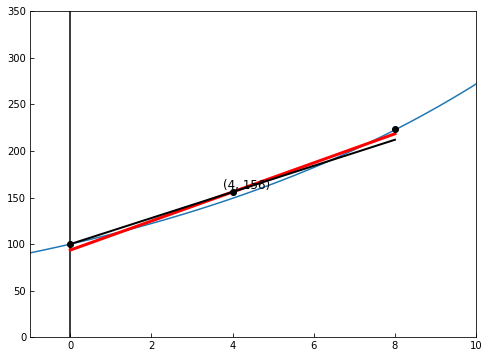

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

# y = mx + b
m = 15.6
b = 156 - m*4
ax.plot((0, 4, 8), (b, 156, m*8+b), 'r-', lw=3)
ax.plot((0, 8), (100, 212), 'k-', lw=2)
ax.plot(0, 100, 'ko', 4, 156, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)

ax.annotate("(4, 156)", (4, 156), xytext=(-10,3), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

* Get new predictor
  * $\partial_3=f(t_{n-1}+.5\Delta t, P_{n-1}+.5\partial_2)\Delta t$
* $\partial_3 = .1(156)(8) = 15.6(8)=124.8$

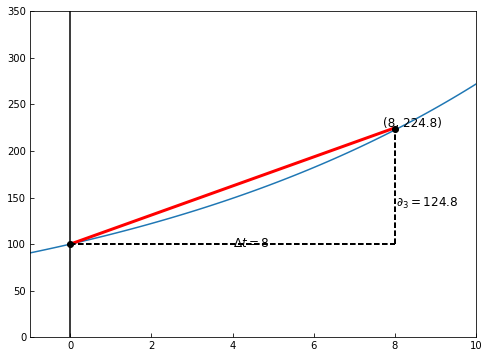

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

# y = mx + b
m = 15.6
b = 156 - m*4
ax.plot((0, 8), (100, 224.8), 'r-', lw=3)
ax.plot(0, 100, 'ko', 8, 223, 'ko')
ax.vlines(0, 0, 350)


ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("$\Delta t = 8$", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 224.8), 'k--', lw=2)
ax.annotate("$\partial_3=124.8$", (8,140), xytext=(1,0), textcoords="offset points", 
            fontsize="large")
ax.annotate("(8, 224.8)", (8,224.8), xytext=(-12,1), textcoords="offset points", 
            fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

##### Fourth Estimate of $\Delta P$

* The fourth estimate $\partial_4$ over the interval $\Delta t$ occurs at the end of the interval
  - $\partial_4=f(t_{n-1}+\Delta t, P_{n-1}+\partial_3)$
* Use the third estimate $(8,224.8)$ to calculate the slope
  * $f(8,224.8)=0.1(224.8)=22.48$

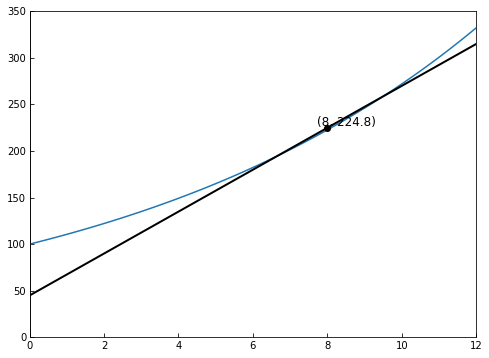

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

# y = mx + b
m = 22.48
b = 224.8 - m*8
ax.plot((0, 8, 12), (b, 224.8, m*12+b), 'k-', lw=2)
ax.plot(8, 224.8, 'ko')
ax.vlines(0, 0, 350)

ax.set_xlim(0, 12)
ax.annotate("(8, 224.8)", (8, 224.8), xytext=(-10,2), 
            textcoords="offset points", fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

* Use this slope to calculate $\partial_4=(0.1)(224.8)(8)=22.48(8)=179.84$

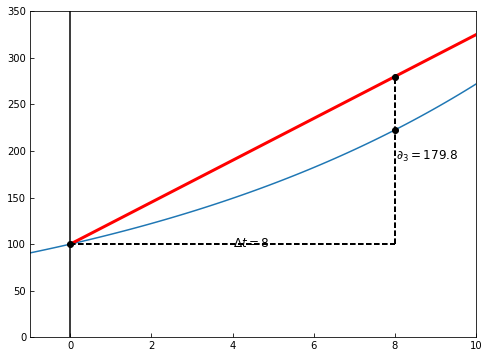

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

# y = mx + b
m = 22.48
b = 279.84 - m*8
ax.plot((0, 8, 12), (100, 279.84, b+12*22.48), 'r-', lw=3)
ax.plot(0, 100, 'ko', 8, 279.84, 'ko', 8, exp_growth(8), 'ko')
ax.vlines(0, 0, 350)


ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.annotate("$\Delta t = 8$", (4,100), xytext=(0,-3), textcoords="offset points", 
            fontsize="large")
ax.plot((8, 8), (100, 279.84), 'k--', lw=2)
ax.annotate("$\partial_3=179.8$", (8,100+179.8/2), xytext=(1,0), textcoords="offset points", 
            fontsize="large")
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()

##### Putting them all Together

* **Runge-Kutta 4 estimate** of P_n
* $P_n = P_{n-1} + (\partial_1 + 2\partial_2 + 2\partial_3 + \partial_4)/6$

$\begin{aligned}
P_1 & = P_0 + (\partial_1 + 2\partial_2 + 2\partial_3 + \partial_4)/6 \cr
& = 100 + (80 + 2\cdot 112 + 2\cdot 124.8 + 179.84)/6 \cr
& = 100 + 122.24 \cr
& = 222.24 \cr
\end{aligned}$

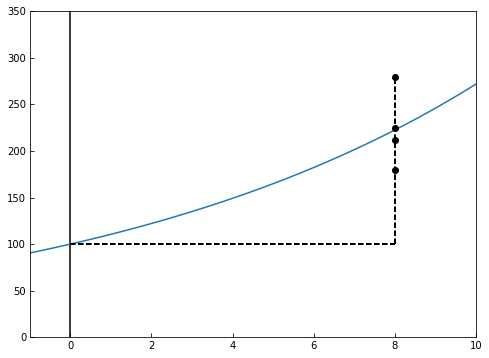

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exp_growth(x))
ax.set_ylim(0, 350)
ax.set_xlim(-1, 10)

# y = mx + b
m = 22.48
b = 279.84 - m*8

ax.plot(8, 180, 'ko', 8, 212, 'ko', 
        8, 224.8, 'ko', 8, 279.84, 'ko')
ax.vlines(0, 0, 350)

ax.plot((0, 8), (100, 100), 'k--', lw=2)
ax.plot((8, 8), (100, 279.84), 'k--', lw=2)
ax.tick_params(direction="in", length=4)
ax.grid(False)
plt.show()